<a href="https://colab.research.google.com/github/Tejaswarreddy/talentbattleml/blob/main/Stress_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from google.colab import files

In [3]:
uploaded=files.upload()

Saving stress.csv to stress.csv


In [4]:
df=pd.read_csv("stress.csv")

In [5]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [6]:
df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [72]:
df.shape

(2838, 116)

In [7]:
df.isnull()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2834,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2835,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2836,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [9]:
#Cleaning Data
import nltk
import re
from nltk. corpus import stopwords
import string
nltk. download( 'stopwords' )
stemmer = nltk. SnowballStemmer("english")
stopword=set (stopwords . words ( 'english' ))

def clean(text):
    text = str(text) . lower()  #returns a string where all characters are lower case. Symbols and Numbers are ignored.
    text = re. sub('\[.*?\]',' ',text)  #substring and returns a string with replaced values.
    text = re. sub('https?://\S+/www\. \S+', ' ', text)#whitespace char with pattern
    text = re. sub('<. *?>+', ' ', text)#special char enclosed in square brackets
    text = re. sub(' [%s]' % re. escape(string. punctuation), ' ', text)#eliminate punctuation from string
    text = re. sub(' \n',' ', text)
    text = re. sub(' \w*\d\w*' ,' ', text)#word character ASCII punctuation
    text = [word for word in text. split(' ') if word not in stopword]  #removing stopwords
    text =" ". join(text)
    text = [stemmer . stem(word) for word in text. split(' ') ]#remove morphological affixes from words
    text = " ". join(text)
    return text
df [ "text"] = df["text"]. apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


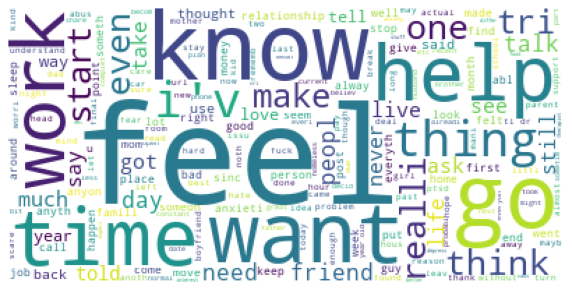

In [10]:
import matplotlib. pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ". join(i for i in df. text)
stopwords = set (STOPWORDS)
wordcloud = WordCloud( stopwords=stopwords,background_color="white") . generate(text)
plt. figure(figsize=(10, 10) )
plt. imshow(wordcloud )
plt. axis("off")
plt. show( )

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [22]:
x=np.array(df["text"])
y=np.array(df["label"])

cv=CountVectorizer()
X=cv.fit_transform(x)

In [49]:
#splitting datasrt into training and testing sets
x_train,x_test, y_train, y_test= train_test_split(X,y,test_size=0.33,random_state=42)

In [50]:
#Training the model
bnb=BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [51]:
y_pred_train=bnb.predict(x_train)
y_pred_test=bnb.predict(x_test)

In [52]:
print(bnb.score(x_train,y_train)*100)
print(bnb.score(x_test,y_test)*100)

93.16149395055234
74.3863393810032


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       906
           1       0.90      0.98      0.94       995

    accuracy                           0.93      1901
   macro avg       0.94      0.93      0.93      1901
weighted avg       0.94      0.93      0.93      1901



In [54]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.61      0.69       444
           1       0.71      0.87      0.78       493

    accuracy                           0.74       937
   macro avg       0.76      0.74      0.74       937
weighted avg       0.75      0.74      0.74       937



In [71]:
user=clean(input("Enter the text:"))
data=cv.transform([user]).toarray()
print(bnb.predict(data))

Enter the text:Sometimes, I feel like i need some help
sometimes, feel like need help
[1]
